(540, 960, 3)


True

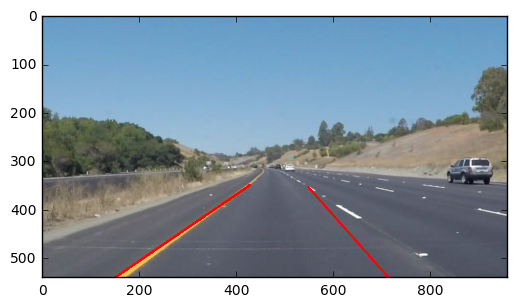

In [41]:
#importing some useful packages
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
import cv2
%matplotlib inline

#reading in an image
image = mpimg.imread('test_images/solidYellowCurve.jpg', cv2.IMREAD_COLOR)

#grayscale the image
gray = cv2.cvtColor(image,cv2.COLOR_RGB2GRAY)

# Define a kernel size and apply Gaussian smoothing
kernel_size = 5
blur_gray = cv2.GaussianBlur(gray,(kernel_size, kernel_size),0)

# Define our parameters for Canny and apply
low_threshold = 50
high_threshold = 150
edges = cv2.Canny(blur_gray, low_threshold, high_threshold)

# Next we'll create a masked edges image using cv2.fillPoly()
mask = np.zeros_like(edges)   
ignore_mask_color = 255   

# This time we are defining a four sided polygon to mask
imshape = image.shape
vertices = np.array([[(0,imshape[0]),(350, 350), (550, 350), (imshape[1],imshape[0])]], dtype=np.int32)
cv2.fillPoly(mask, vertices, ignore_mask_color)
masked_edges = cv2.bitwise_and(edges, mask)

# Define the Hough transform parameters
# Make a blank the same size as our image to draw on
rho = 2 # distance resolution in pixels of the Hough grid
theta = 1*np.pi/180 # angular resolution in radians of the Hough grid
threshold = 15     # minimum number of votes (intersections in Hough grid cell)
min_line_length = 10 #minimum number of pixels making up a line
max_line_gap = 10    # maximum gap in pixels between connectable line segments
line_image = np.copy(image)*0 # creating a blank to draw lines on

# Run Hough on edge detected image
# Output "lines" is an array containing endpoints of detected line segments
lines = cv2.HoughLinesP(masked_edges, rho, theta, threshold, np.array([]),
                            min_line_length, max_line_gap)

# Iterate over the output "lines" and draw lines on a blank image
Left_xArr = []
Left_yArr = []
Right_xArr = []
Right_yArr = []
for line in lines:
    for x1,y1,x2,y2 in line:
        slope = float((y2-y1)/(x2-x1))

        if not np.isnan(slope) or np.isinf(slope) or (slope == 0):
            if (slope > -1) and (slope < -0.6):
                #left_slopes = np.append(left_slopes, slope)
                #left_slope_count += 1
                Left_xArr.append(x1)
                Left_xArr.append(x2)
                Left_yArr.append(y1)
                Left_yArr.append(y2)
            if (slope > 0.2) and (slope < 1.5) :
                #right_slopes = np.append(right_slopes, slope)
                Right_xArr.append(x1)
                Right_xArr.append(x2)
                Right_yArr.append(y1)
                Right_yArr.append(y2)
                
Left_X_min=min(Left_xArr)
Left_X_max=max(Left_xArr)
Left_Y_min=min(Left_yArr)
Left_Y_max=max(Left_yArr)

Right_X_min=min(Right_xArr)
Right_X_max=max(Right_xArr)
Right_Y_min=min(Right_yArr)
Right_Y_max=max(Right_yArr)

slope_left = float((Left_Y_min-Left_Y_max)/(Left_X_max-Left_X_min))
Left_X_min = int(Left_X_min - (Left_Y_max - image.shape[0])/slope_left)

slope_right = float((Right_Y_max-Right_Y_min)/(Right_X_max-Right_X_min))
Right_X_max = int(Right_X_max - (image.shape[0] - Right_Y_max)/slope_right)

cv2.line(image, (Left_X_min, image.shape[0]), (Left_X_max, Left_Y_min), (255, 0, 0), 3)
cv2.line(image, (Right_X_min, Right_Y_min), (Right_X_max, image.shape[0]), (255, 0, 0), 3)

# Create a "color" binary image to combine with line image
color_edges = np.dstack((edges, edges, edges)) 

# Draw the lines on the edge image
lines_edges = cv2.addWeighted(image, 1, line_image, 1, 0) 
# print('This image is:', type(lines_edges), 'with dimensions:', image.shape)
plt.imshow(lines_edges)
print(image.shape);
cv2.imwrite('result.jpg', image)